## Course: DSC550
## Assignment: 5.2 Exercise
## Name: Laura Hoffmann
## Date: 4/17/2021

#### Import the Libraries

In [1]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

In [2]:
# load the data
articles = pd.read_csv('articles1.csv')

In [3]:
# find the data shape and display the data
print("The dimension of the table is:", articles.shape)
# display the data
articles.head()

The dimension of the table is: (50000, 10)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
# find what types of variables are in the data
print("Describe Data:")
print(round(articles.describe(),2))
print("*"*70)
print("Summarized Data:")
print(articles.describe(include=['O']))

Describe Data:
       Unnamed: 0        id      year     month  url
count    50000.00  50000.00  50000.00  50000.00  0.0
mean     25694.38  44432.45   2016.27      5.51  NaN
std      15350.14  15773.62      0.63      3.33  NaN
min          0.00  17283.00   2011.00      1.00  NaN
25%      12500.75  31236.75   2016.00      3.00  NaN
50%      25004.50  43757.50   2016.00      5.00  NaN
75%      38630.25  57479.25   2017.00      8.00  NaN
max      53291.00  73469.00   2017.00     12.00  NaN
**********************************************************************
Summarized Data:
                                                    title publication  \
count                                               50000       50000   
unique                                              49920           5   
top     The 10 most important things in the world righ...   Breitbart   
freq                                                    7       23781   

                author        date        content  
co

In [5]:
# display the length of the data
len(articles)

50000

In [6]:
# display the publishers (unique values in the publication column)
articles.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

In [7]:
# display the number of articles from each year
articles['year'].value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

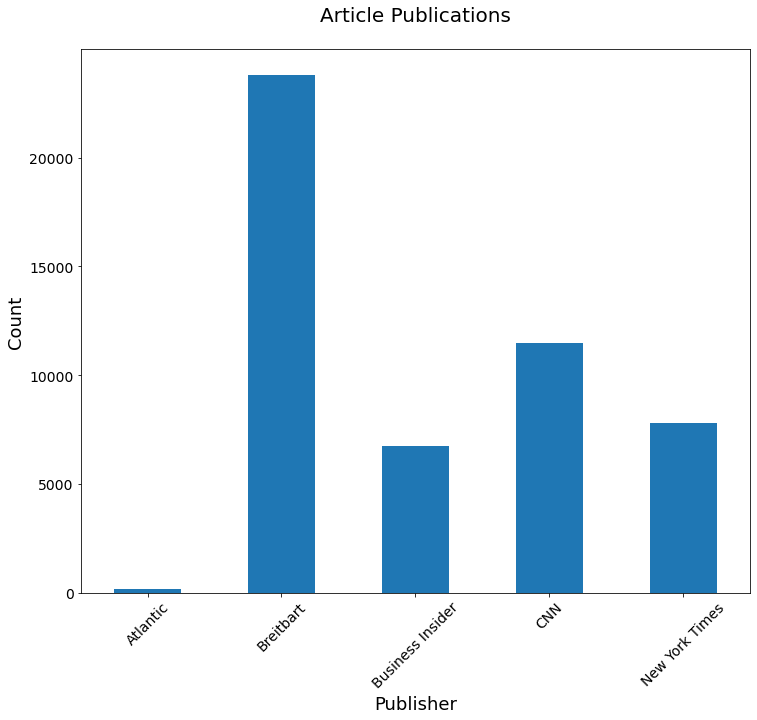

In [8]:
# display bar charts to show the number of publications by each publisher
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Publications\n', fontsize=20)
ax.set_xlabel('Publisher', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.xticks(rotation = 45)
plt.show()

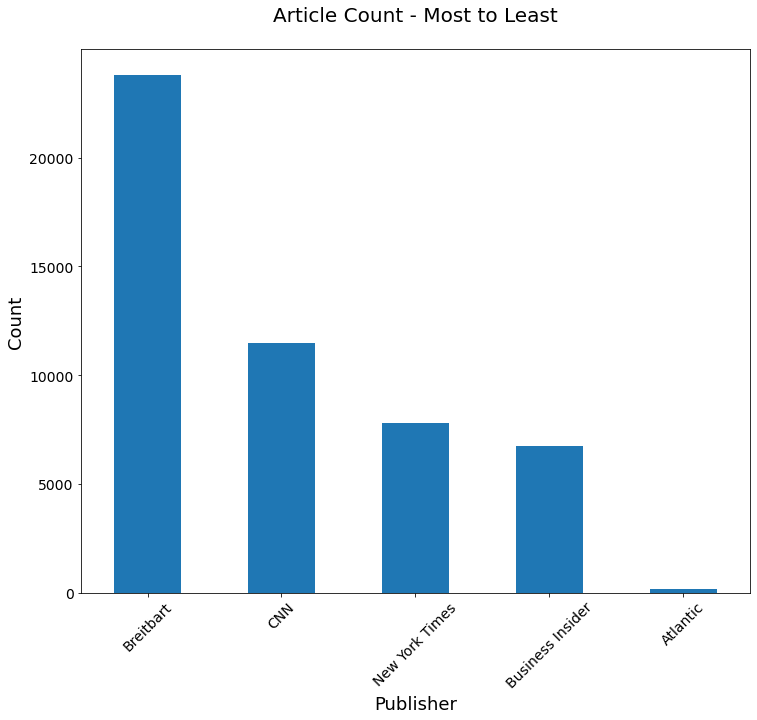

In [9]:
# display bar charts to show the number of publications by each publisher sorted by count
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - Most to Least\n', fontsize=20)
ax.set_xlabel('Publisher', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [10]:
# clean the text to be all lowercase and no punctuation
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

# apply the clean_text function to the text column 
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
# display the text column
articles['tokenized'].head()

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object

In [11]:
# find the mean, minimum and maximum article lengths
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean:",round(articles['num_wds'].mean(),0))
print("Min:",round(articles['num_wds'].min(),0))
print("Max:",round(articles['num_wds'].max(),0))

Mean: 636.0
Min: 0
Max: 24736


In [12]:
# remove articles with no words
articles = articles[articles['num_wds']>0]
print("New Mean:",articles['num_wds'].mean())
print("New Min:",articles['num_wds'].min())

New Mean: 637.0886752778612
New Min: 1


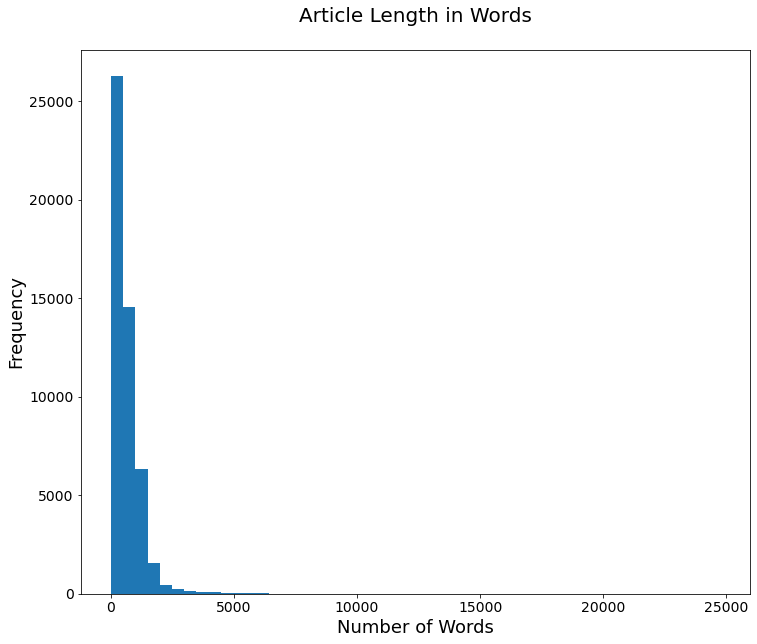

In [13]:
# check for outliers by showing a bar graph for number of words
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
plt.show()

It's difficult to see on this small display if there are outliers but I know there must be because the maximum length for an article is 24736 words and I can't even see a bar for that number. I can barely see a bar past 5000 words. So I decided to make a box plot, which once again isn't too clear but definitely shows a few outliers near 15000, 17000, 20000 and and 25000. 

Text(0.5, 0, 'Number of Words')

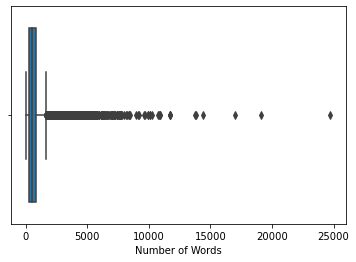

In [18]:
import seaborn as sns
sns.boxplot(x=articles['num_wds'])
plt.xlabel("Number of Words")